
Detailed Statistics:
--------------------------------------------------
Number of simulations: 10,000
Empirical mean: 1.2842
Theoretical mean: 1.2533
Empirical median: 1.2039
Theoretical median: 1.1774
Standard deviation: 0.6323
Theoretical std: 0.5227


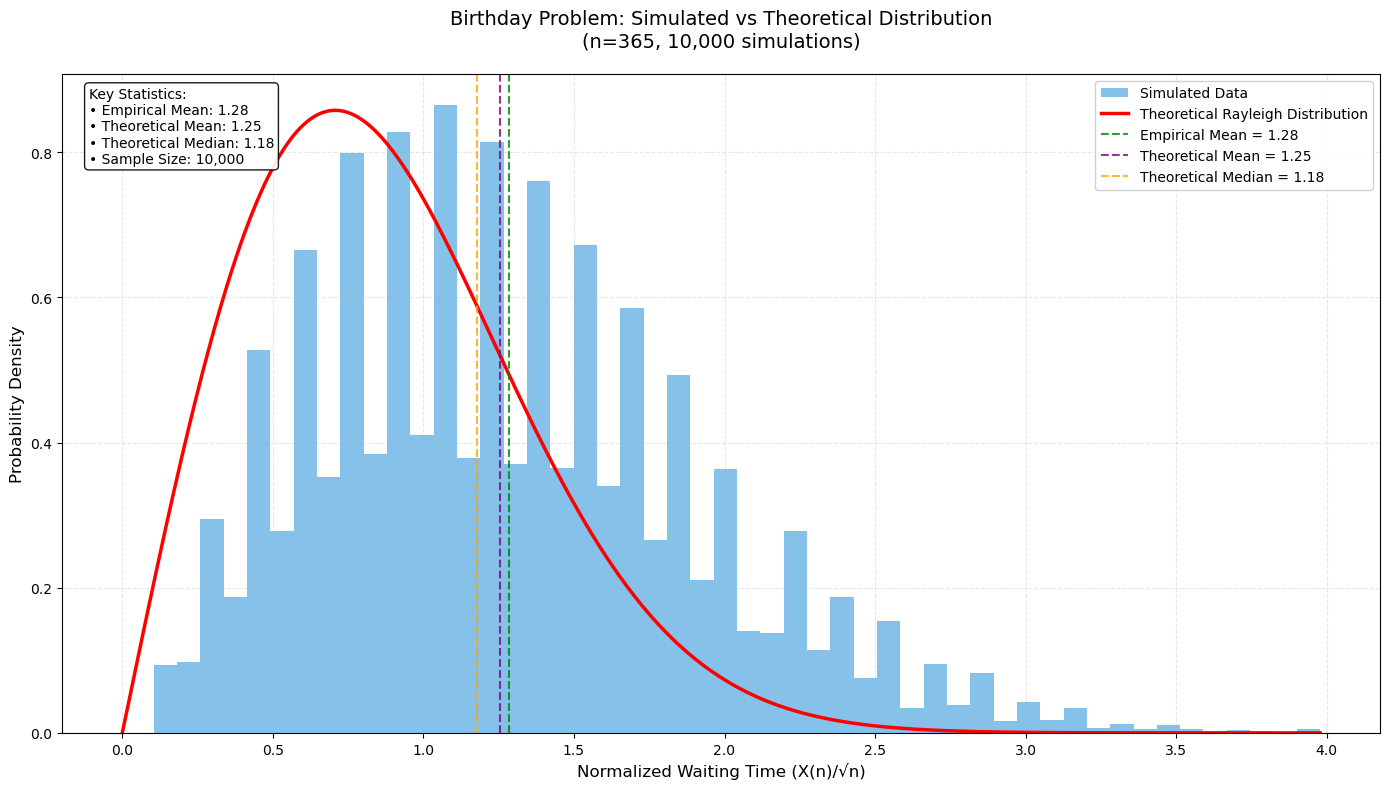

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rayleigh
import seaborn as sns

def simulate_first_repeat(n, num_simulations=10000):
    """
    Simulate the birthday problem and return normalized waiting times.
    
    Parameters:
    -----------
    n : int
        Number of possible values (e.g., 365 for days in a year)
    num_simulations : int
        Number of Monte Carlo simulations to run
        
    Returns:
    --------
    numpy.ndarray
        Array of normalized waiting times (X(n)/√n)
    """
    waiting_times = []
    for _ in range(num_simulations):
        seen = set()
        for i in range(1, n + 1):
            draw = np.random.randint(1, n + 1)
            if draw in seen:
                waiting_times.append(i)
                break
            seen.add(draw)
    return np.array(waiting_times) / np.sqrt(n)

# Set style for better visualization

sns.set_palette("husl")

# Run simulations
n = 365
np.random.seed(42)  # For reproducibility
normalized_times = simulate_first_repeat(n)

# Create figure and axes with specific size
fig, ax = plt.subplots(figsize=(14, 8))

# Plot histogram with better formatting
hist_color = '#3498db'
hist = ax.hist(normalized_times, bins=50, density=True, alpha=0.6, 
               color=hist_color, label='Simulated Data')

# Calculate and plot theoretical Rayleigh distribution
x = np.linspace(0, max(normalized_times), 1000)
theory_line = rayleigh.pdf(x, scale=1/np.sqrt(2))
ax.plot(x, theory_line, 'r-', linewidth=2.5, 
        label='Theoretical Rayleigh Distribution')

# Add vertical lines for important statistics
mean_empirical = np.mean(normalized_times)
mean_theoretical = np.sqrt(np.pi/2)
median_theoretical = np.sqrt(2 * np.log(2))

ax.axvline(mean_empirical, color='g', linestyle='--', alpha=0.8,
           label=f'Empirical Mean = {mean_empirical:.2f}')
ax.axvline(mean_theoretical, color='purple', linestyle='--', alpha=0.8,
           label=f'Theoretical Mean = {mean_theoretical:.2f}')
ax.axvline(median_theoretical, color='orange', linestyle='--', alpha=0.8,
           label=f'Theoretical Median = {median_theoretical:.2f}')

# Enhance the plot with better formatting
ax.set_title('Birthday Problem: Simulated vs Theoretical Distribution\n'
             f'(n={n}, {len(normalized_times):,} simulations)',
             fontsize=14, pad=20)
ax.set_xlabel('Normalized Waiting Time (X(n)/√n)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)

# Add grid with better formatting
ax.grid(True, alpha=0.3, linestyle='--')

# Create legend with better formatting
ax.legend(loc='upper right', bbox_to_anchor=(1, 1),
         fontsize=10, framealpha=0.9)

# Add explanatory text
text_str = (
    f"Key Statistics:\n"
    f"• Empirical Mean: {mean_empirical:.2f}\n"
    f"• Theoretical Mean: {mean_theoretical:.2f}\n"
    f"• Theoretical Median: {median_theoretical:.2f}\n"
    f"• Sample Size: {len(normalized_times):,}"
)
props = dict(boxstyle='round', facecolor='white', alpha=0.9)
ax.text(0.02, 0.98, text_str, transform=ax.transAxes,
        fontsize=10, verticalalignment='top',
        bbox=props)

# Adjust layout
plt.tight_layout()

# Print detailed statistics
print("\nDetailed Statistics:")
print("-" * 50)
print(f"Number of simulations: {len(normalized_times):,}")
print(f"Empirical mean: {mean_empirical:.4f}")
print(f"Theoretical mean: {mean_theoretical:.4f}")
print(f"Empirical median: {np.median(normalized_times):.4f}")
print(f"Theoretical median: {median_theoretical:.4f}")
print(f"Standard deviation: {np.std(normalized_times):.4f}")
print(f"Theoretical std: {np.sqrt(4/np.pi - 1):.4f}")

Number of people needed for 50% chance: 23
Square root of 365: 19.1


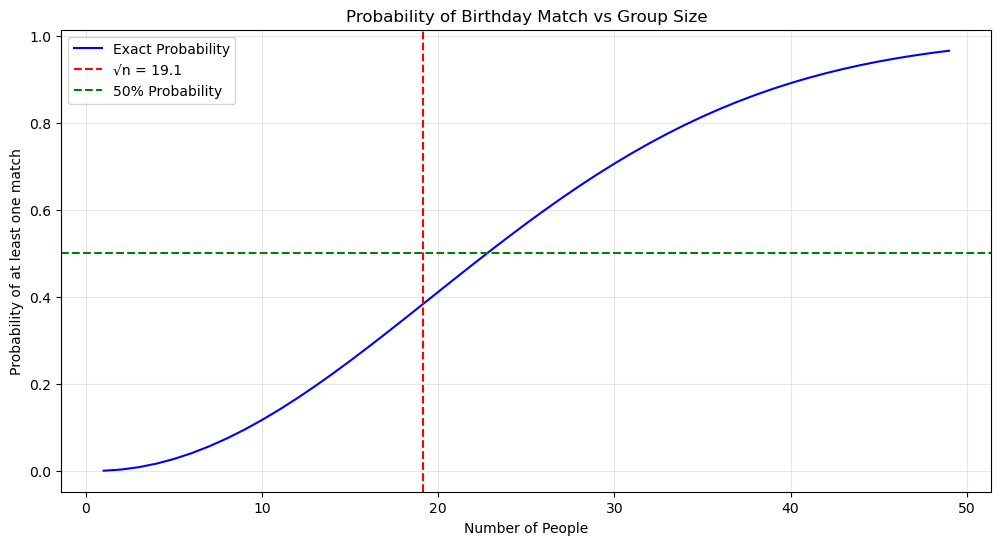

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def prob_no_match(n, k):
    """Probability of no match in k people with n possible values"""
    prob = 1.0
    for i in range(k):
        prob *= (1 - i/n)
    return prob

n = 365
k_values = np.arange(1, 50)
probs = [1 - prob_no_match(n, k) for k in k_values]

plt.figure(figsize=(12, 6))
plt.plot(k_values, probs, 'b-', label='Exact Probability')
plt.axvline(x=np.sqrt(n), color='r', linestyle='--', 
            label=f'√n = {np.sqrt(n):.1f}')
plt.axhline(y=0.5, color='g', linestyle='--', 
            label='50% Probability')

plt.title('Probability of Birthday Match vs Group Size')
plt.xlabel('Number of People')
plt.ylabel('Probability of at least one match')
plt.grid(True, alpha=0.3)
plt.legend()

# Print some interesting values
k_50 = next(k for k, p in zip(k_values, probs) if p > 0.5)
print(f"Number of people needed for 50% chance: {k_50}")
print(f"Square root of 365: {np.sqrt(365):.1f}")

Number of pairs at k=20: 190
Compared to n=365: 0.5x the number of days


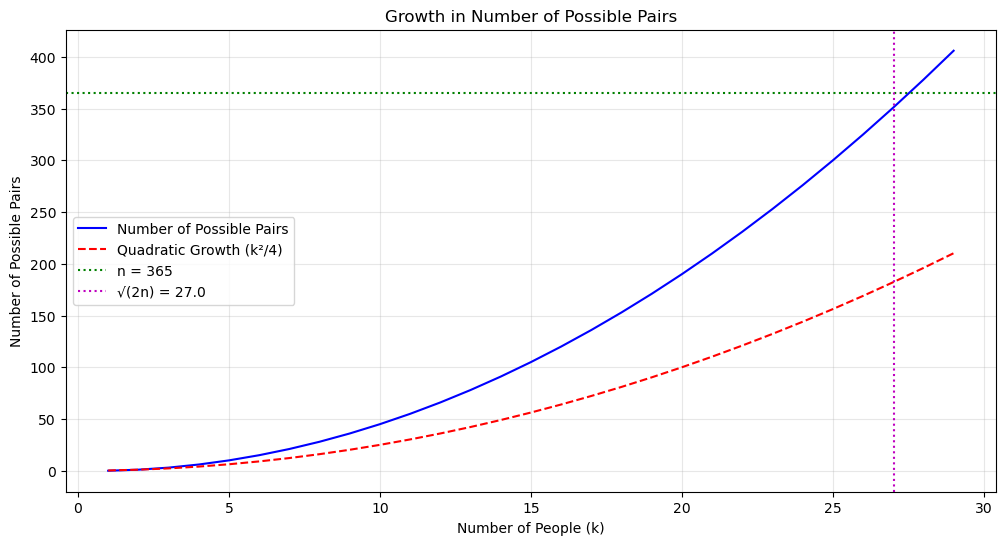

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def num_possible_pairs(k):
    """Number of possible pairs among k people"""
    return (k * (k-1)) // 2

k_values = np.arange(1, 30)
pairs = [num_possible_pairs(k) for k in k_values]

plt.figure(figsize=(12, 6))

# Plot number of pairs
plt.plot(k_values, pairs, 'b-', label='Number of Possible Pairs')
plt.plot(k_values, k_values**2/4, 'r--', label='Quadratic Growth (k²/4)')

# Add reference line at n=365
plt.axhline(y=365, color='g', linestyle=':', label='n = 365')
plt.axvline(x=np.sqrt(2*365), color='m', linestyle=':', 
            label=f'√(2n) = {np.sqrt(2*365):.1f}')

plt.title('Growth in Number of Possible Pairs')
plt.xlabel('Number of People (k)')
plt.ylabel('Number of Possible Pairs')
plt.grid(True, alpha=0.3)
plt.legend()

print(f"Number of pairs at k=20: {num_possible_pairs(20)}")
print(f"Compared to n=365: {num_possible_pairs(20)/365:.1f}x the number of days")

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Create data
x = np.linspace(0, 4, 1000)
rayleigh = x * np.exp(-x**2/2)

# Calculate key values
mode = 1.0
mean = np.sqrt(np.pi/2)
median = np.sqrt(2 * np.log(2))



# Print numerical values
print("Numerical Values:")
print(f"Mode = {mode:.4f}")
print(f"Mean = {mean:.4f}")
print(f"Median = {median:.4f}")

# For birthday problem context
print("\nIn Birthday Problem Context (n=365):")
print(f"Most likely waiting time: {mode * np.sqrt(365):.1f} people")
print(f"Average waiting time: {mean * np.sqrt(365):.1f} people")
print(f"Median waiting time: {median * np.sqrt(365):.1f} people")

Numerical Values:
Mode = 1.0000
Mean = 1.2533
Median = 1.1774

In Birthday Problem Context (n=365):
Most likely waiting time: 19.1 people
Average waiting time: 23.9 people
Median waiting time: 22.5 people


The reason the Rayleigh distribution appears in so many places is that it naturally emerges whenever you have:

- Two independent normal (Gaussian) components
- Are interested in the magnitude of their combined effect
- Are looking at the time until first occurrence of some event

This is why it shows up in the birthday problem too - we're looking at the first occurrence of a match in a situation where multiple independent factors combine.